In [51]:
from sympy import *
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex


init_printing(use_latex=True)

<lambdifygenerated-36>:2: RuntimeWarning: invalid value encountered in log
  return x**2 + log((x - 2)**(-1.0))


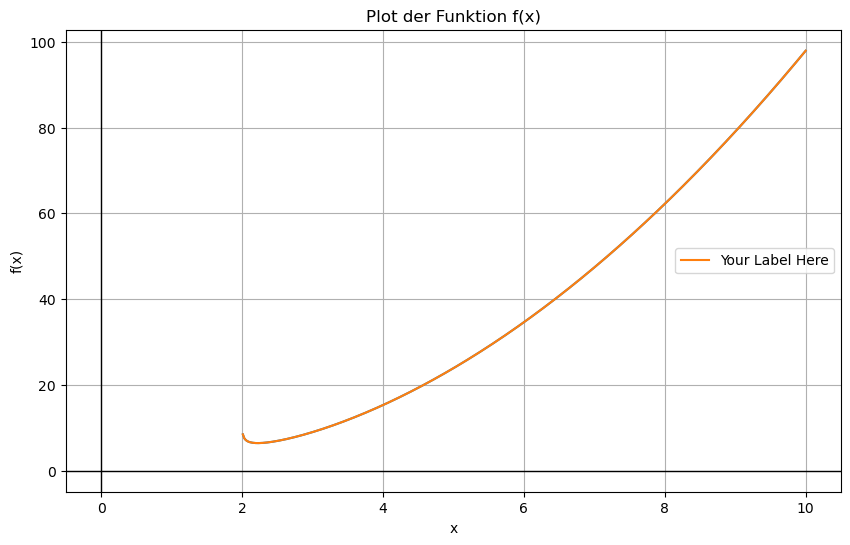

In [52]:
x = symbols('x')
f = x**2+(ln(1/(x-1)))
x_values = np.linspace(-10, 10, 1000)
y_values = sp.lambdify(x, f, modules=['numpy'])(x_values)

# Plotten der Funktion
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot der Funktion f(x)')
plt.plot(x_values, y_values, label='Your Label Here')

#plt.xticks(np.arange(-2, 2, 0.5))
#plt.yticks(np.arange(-2, 2, 0.5))

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

plt.grid(True)
plt.legend()
plt.show()

Normal function


First derivative


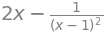

Second derivative


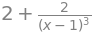

In [53]:
nf = root(x**2+(1/(x-1)))
nf_d1 = nf.diff()
nf_d2 = nf_d1.diff()

print("Normal function")
display(simplify(nf))
print(f"First derivative")
display(simplify(nf_d1))
print(f"Second derivative")
display(simplify(nf_d2))

# Newton's Method

Newton's Method, also known as the Newton-Raphson method, is an iterative approach to find the roots of a real-valued function. The formula for the method is given by:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$


In [54]:
tol = 1e-9
approx_x = 1.9
f = sp.lambdify(x, nf_d1, 'numpy')
df = sp.lambdify(x, nf_d2, 'numpy')
iter = 0
max_iter = 100

while abs(f(approx_x)) > tol:
    approx_x = approx_x - (f(approx_x)/df(approx_x))
    iter += 1
    print(f"Iteration {iter}: x = {np.round(approx_x, 4)}, f(x) = {f(approx_x)}")
    if (iter > max_iter):
        print("Max iterations reached.")
        break

print(f"The approximated x is {approx_x} after {iter} iterations.\nThe value of the function |f(x)| is {abs(f(approx_x))}.")



Iteration 1: x = 1.3592, f(x) = -5.033541151646227
Iteration 2: x = 1.4706, f(x) = -1.573925691136302
Iteration 3: x = 1.5449, f(x) = -0.2782222320872503
Iteration 4: x = 1.5643, f(x) = -0.012191267455778476
Iteration 5: x = 1.5652, f(x) = -2.5448509994863144e-05
Iteration 6: x = 1.5652, f(x) = -1.1132916810652205e-10
The approximated x is 1.5651977173751261 after 6 iterations.
The value of the function |f(x)| is 1.1132916810652205e-10.
